<a href="https://colab.research.google.com/github/prtk2001/Face-Detection-Algorithm/blob/main/facedetectiomodel_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

file_id = '17e6m5fPrbY3EtVg66yGkjCyn5YJkx3P2'

# Download dataset
!gdown https://drive.google.com/uc?id={file_id}

# Unzip the downloaded file
!unzip -q face-detection-copy.zip

Downloading...
From: https://drive.google.com/uc?id=17e6m5fPrbY3EtVg66yGkjCyn5YJkx3P2
To: /content/face-detection-copy.zip
149MB [00:02, 61.2MB/s]


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [6]:
import pathlib
data_dir = "/content/face-detection - Copy"
#data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, unzip=True)
data_dir = pathlib.Path(data_dir)

In [7]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

1099


In [9]:
batch_size = 32
img_height = 180
img_width = 180

In [10]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1517 files belonging to 5 classes.
Using 1214 files for training.


In [11]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1517 files belonging to 5 classes.
Using 303 files for validation.


In [12]:
class_names = train_ds.class_names
print(class_names)

['Id card  Images', 'animated', 'clear', 'obstruction', 'unprofessional']


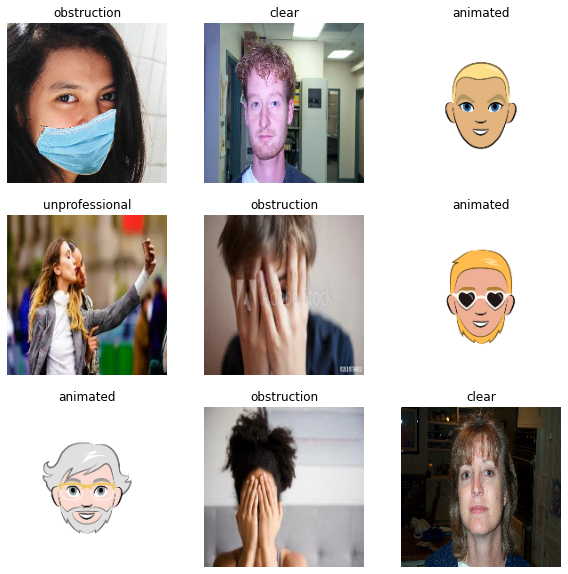

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [14]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [15]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [16]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [18]:
num_classes = 5
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_2 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 45, 45, 64)       

In [22]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
38/38 [==============================] - 50s 1s/step - loss: 1.0075 - accuracy: 0.5708 - val_loss: 0.7724 - val_accuracy: 0.6997
Epoch 2/15
38/38 [==============================] - 44s 1s/step - loss: 0.5956 - accuracy: 0.7743 - val_loss: 0.6279 - val_accuracy: 0.7525
Epoch 3/15
38/38 [==============================] - 44s 1s/step - loss: 0.5499 - accuracy: 0.7768 - val_loss: 0.5678 - val_accuracy: 0.8020
Epoch 4/15
38/38 [==============================] - 46s 1s/step - loss: 0.4720 - accuracy: 0.8105 - val_loss: 0.6790 - val_accuracy: 0.7327
Epoch 5/15
38/38 [==============================] - 44s 1s/step - loss: 0.4482 - accuracy: 0.8229 - val_loss: 0.5446 - val_accuracy: 0.8086
Epoch 6/15
38/38 [==============================] - 45s 1s/step - loss: 0.3821 - accuracy: 0.8509 - val_loss: 0.5106 - val_accuracy: 0.8218
Epoch 7/15
38/38 [==============================] - 44s 1s/step - loss: 0.3650 - accuracy: 0.8583 - val_loss: 0.4633 - val_accuracy: 0.8317
Epoch 8/15
38/38 [==

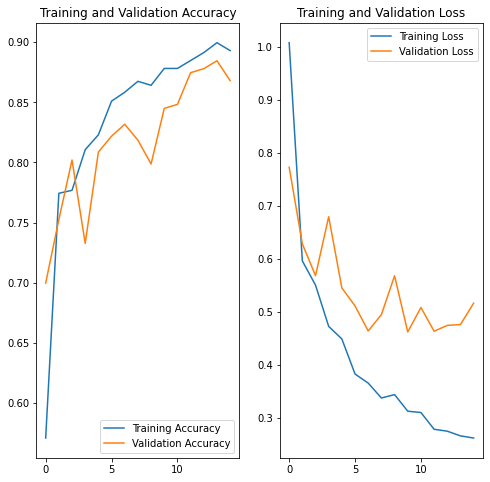

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [27]:
model.save('face_model.h5')

Saving WIN_20210130_17_49_35_Pro.jpg to WIN_20210130_17_49_35_Pro.jpg
This image most likely belongs to clear with a 48.55 percent confidence.


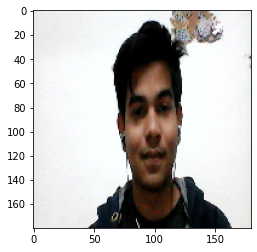

[-3.3016107 -8.934685   3.478752   2.775707   2.9049807]


In [31]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
for fn in uploaded.keys():
  path = '/content/' + fn
  #img = load_image(path)
  img = keras.preprocessing.image.load_img(
    path, target_size=(img_height, img_width)
    )
  img_array = keras.preprocessing.image.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0) # Create a batch
  predictions = model.predict(img_array)
  score = tf.nn.softmax(predictions[0])

  print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
  )
  #img = load_image('/content/face-detection/val/obstruction/00595_Mask.jpg')
  #prediction = predict(img)
  #print("PREDICTED: class: %s, confidence: %f" % (list(prediction.keys())[0], list(prediction.values())[0]))
  plt.imshow(img)
  #plt.figure(idx)    
  plt.show()
  print(predictions[0])

In [ ]:
responses = []
response = []
image_names = []
raw_images = []
classes=['Id card  Images', 'animated', 'clear', 'obstruction', 'unprofessional']
print('detections:')
for i in range(nums[0]):
  print('\t{}, {}'.format(class_names[i],
                            np.array(predictions[0][i])
                                            )
  responses.append({
                "class": class_names[i],
                "confidence": float("{0:.2f}".format(np.array(predictions[0][i])*100))
            })
response.append({
            
            "detections": responses
        })
print(response)

In [32]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
for fn in uploaded.keys():
  path = '/content/' + fn
  #img = load_image(path)
  img = keras.preprocessing.image.load_img(
    path, target_size=(img_height, img_width)
    )
  img_array = keras.preprocessing.image.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0) # Create a batch
  predictions = model.predict(img_array)
  score = tf.nn.softmax(predictions[0])

  print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
  )
  #img = load_image('/content/face-detection/val/obstruction/00595_Mask.jpg')
  #prediction = predict(img)
  #print("PREDICTED: class: %s, confidence: %f" % (list(prediction.keys())[0], list(prediction.values())[0]))
  plt.imshow(img)
  #plt.figure(idx)    
  plt.show()
  #print(predictions[0])
  responses = []
  response = []
  image_names = []
  raw_images = []
  classes=['Id card  Images', 'animated', 'clear', 'obstruction', 'unprofessional']
  print('detections:')
  for i in range(nums[0]):
    print('\t{}, {}'.format(class_names[i],
                              np.array(predictions[0][i])
                                              )
    responses.append({
                  "class": class_names[i],
                  "confidence": float("{0:.2f}".format(np.array(predictions[0][i])*100))
              })
  response.append({
              
              "detections": responses
          })
  print(response)

SyntaxError: ignored